In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import OneHotEncoder,StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
NN2020nativeborndf = pd.read_excel('NN2020_nativeborn.xlsx', header=0, index_col=0)
NN2020nativeborndf

,registered (number),MOE 1,registered (percent),MOE 2,not registered (number),MOE 3,not registered (percent),MOE 4,no response (number),MOE 5,no response (percent),MOE 6
All races,154035,952,73.3,0.4,22298,546,10.6,0.3,33751,655,16.1,0.3
White alone,127484,971,74.8,0.4,17497,489,10.3,0.3,25350,579,14.9,0.3
White non-Hispanic alone,115123,966,76.6,0.4,13706,436,9.1,0.3,21366,536,14.2,0.3
Black alone,18864,506,68.7,1.1,2864,204,10.4,0.7,5744,287,20.9,0.9
Asian alone,2799,201,56.8,2.7,631,96,12.8,1.8,1499,148,30.4,2.5
Hispanic (of any race),14081,441,61.5,1.2,4220,247,18.4,1.0,4594,257,20.1,1.0
White alone or in combination,130158,971,74.7,0.4,18111,497,10.4,0.3,25922,584,14.9,0.3
Black alone or in combination,20180,522,68.6,1.0,3196,215,10.9,0.7,6022,293,20.5,0.9
Asian alone or in combination,3546,226,59.4,2.4,746,104,12.5,1.6,1676,156,28.1,2.2


In [3]:
NN2020naturalizeddf = pd.read_excel('NN2020_naturalized.xlsx', header=0, index_col=0)
NN2020naturalizeddf

,registered (number),MOE 1,registered (percent),MOE 2,not registered (number),MOE 3,not registered (percent),MOE 4,no response (number),MOE 5,no response (percent),MOE 6
All races,14273,444,66.4,1.2,3484,224,16.2,1.0,3752,233,17.4,1.0
White alone,7405,325,64.1,1.7,2051,173,17.7,1.4,2104,175,18.2,1.4
White non-Hispanic alone,3266,217,70.5,2.6,545,89,11.8,1.8,821,109,17.7,2.1
Black alone,1980,170,72.5,3.3,314,68,11.5,2.3,438,80,16.0,2.7
Asian alone,4556,256,69.0,2.2,1005,121,15.2,1.7,1041,123,15.8,1.7
Hispanic (of any race),4638,258,60.0,2.1,1659,155,21.5,1.8,1435,145,18.6,1.7
White alone or in combination,7552,328,64.0,1.7,2075,174,17.6,1.3,2165,177,18.4,1.4
Black alone or in combination,2061,173,71.7,3.2,339,70,11.8,2.3,476,83,16.6,2.7
Asian alone or in combination,4611,257,69.1,2.2,1012,121,15.2,1.7,1051,124,15.7,1.7


In [4]:
df = pd.read_csv('Clean 2020 Economics.csv')

df.columns = df.columns.str.strip()
df = df.drop(index=0)

df_clean = df[["Income Level", "Reported registered", "Reported not registered"]].copy()
df_clean["Reported registered"] = df_clean["Reported registered"].str.replace(",", "").astype(int)
df_clean["Reported not registered"] = df_clean["Reported not registered"].str.replace(",", "").astype(int)


# Melt the Data 
df_melted = df_clean.melt(id_vars="Income Level", 
                          var_name="Registration Status", 
                          value_name="Count")

df_clean.head()

,Income Level,Reported registered,Reported not registered
1,"Under $10,000",1523,629
2,"$10,000 - $14,999",1745,645
3,"$15,000 - $19,999",1637,787
4,"$20,000 - $29,999",5124,1661
5,"$30,000 - $39,999",7637,1848


Accuracy: 0.3333333333333333


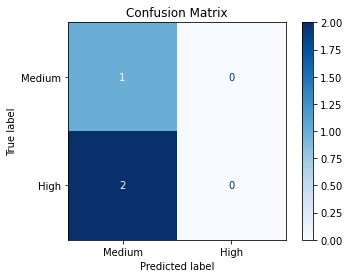

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing
# Assuming df is the original DataFrame containing the data
df_clean = df.copy()

# Remove commas and convert relevant columns to numeric
for col in ["Total population", "Total citizen population", "Reported registered",
            "Reported not registered", "No response", "Reported voted", 
            "Reported not voted", "No response to voting2"]:
    df_clean[col] = df_clean[col].str.replace(",", "").astype(int)

# Calculate voter registration percentage
df_clean["Reported registered percentage"] = (df_clean["Reported registered"] / df_clean["Total citizen population"]) * 100

# Categorize the registration percentage into ranges
bins = [0, 50, 70, 100]  # Example bins for percentage ranges
labels = ["Low", "Medium", "High"]
df_clean["Registration Percentage Category"] = pd.cut(df_clean["Reported registered percentage"], bins=bins, labels=labels)

# Encode target categories into integers
df_clean["Registration Percentage Category (encoded)"] = df_clean["Registration Percentage Category"].cat.codes

# One-Hot Encode Income Level
encoder = OneHotEncoder(sparse_output=False, drop="first")
income_level_encoded = encoder.fit_transform(df_clean[["Income Level"]])

# Create DataFrame for the encoded columns
income_level_encoded_df = pd.DataFrame(
    income_level_encoded, 
    columns=encoder.get_feature_names_out(["Income Level"])
)

# Select features and target
X = income_level_encoded_df  # One-hot encoded Income Level columns
y = df_clean["Registration Percentage Category (encoded)"]  # Categorical target based on registration percentage

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=200)  # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Get actual unique labels in y_test and y_pred to adjust confusion matrix labels
unique_labels = np.unique(np.concatenate([y_test, y_pred]))

# Map the labels to their names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[i] for i in unique_labels])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.25


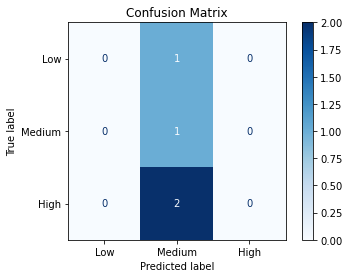

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
NN2020nativeborndf["Citizenship Status"] = "native-born"
NN2020naturalizeddf["Citizenship Status"] = "naturalized"

# Combine datasets
df_clean2 = pd.concat([NN2020nativeborndf, NN2020naturalizeddf], ignore_index=True)

# Categorize voter registration rates
bins = [0, 60, 70, 80]  # Example bins: <60%, 60-70%, >70%
labels = ["Low", "Medium", "High"]
df_clean2["Registration Category"] = pd.cut(df_clean2["registered (percent)"], bins=bins, labels=labels)

# Encode Registration Categories as integers for the model
df_clean2["Registration Category (encoded)"] = df_clean2["Registration Category"].cat.codes

# One-hot encode Citizenship Status
encoder = OneHotEncoder(sparse_output=False, drop="first")
citizenship_encoded = encoder.fit_transform(df_clean2[["Citizenship Status"]]) 

# Convert encoded features to a DataFrame
X = pd.DataFrame(citizenship_encoded, columns=encoder.get_feature_names_out(["Citizenship Status"]))
y = df_clean2["Registration Category (encoded)"]  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [7]:
df_clean2.head(10)

,registered (number),MOE 1,registered (percent),MOE 2,not registered (number),MOE 3,not registered (percent),MOE 4,no response (number),MOE 5,no response (percent),MOE 6,Citizenship Status,Registration Category,Registration Category (encoded)
0,154035,952,73.3,0.4,22298,546,10.6,0.3,33751,655,16.1,0.3,native-born,High,2
1,127484,971,74.8,0.4,17497,489,10.3,0.3,25350,579,14.9,0.3,native-born,High,2
2,115123,966,76.6,0.4,13706,436,9.1,0.3,21366,536,14.2,0.3,native-born,High,2
3,18864,506,68.7,1.1,2864,204,10.4,0.7,5744,287,20.9,0.9,native-born,Medium,1
4,2799,201,56.8,2.7,631,96,12.8,1.8,1499,148,30.4,2.5,native-born,Low,0
5,14081,441,61.5,1.2,4220,247,18.4,1.0,4594,257,20.1,1.0,native-born,Medium,1
6,130158,971,74.7,0.4,18111,497,10.4,0.3,25922,584,14.9,0.3,native-born,High,2
7,20180,522,68.6,1.0,3196,215,10.9,0.7,6022,293,20.5,0.9,native-born,Medium,1
8,3546,226,59.4,2.4,746,104,12.5,1.6,1676,156,28.1,2.2,native-born,Low,0
9,14273,444,66.4,1.2,3484,224,16.2,1.0,3752,233,17.4,1.0,naturalized,Medium,1
